In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = load_breast_cancer().data
Y = load_breast_cancer().target

In [3]:
X.shape

(569, 30)

In [4]:
Y.shape

(569,)

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.33)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape


((381, 30), (381,), (188, 30), (188,))

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [11]:
type(X_train)

numpy.ndarray

In [12]:
X_train_norm_mod = torch.from_numpy(X_train_norm.astype("float32"))
X_test_norm_mod = torch.from_numpy(X_test_norm.astype("float32"))
Y_train_mod = torch.from_numpy(Y_train.astype("float32")).reshape(-1,1)
Y_test_mod = torch.from_numpy(Y_test.astype("float32")).reshape(-1,1)

In [13]:
type(Y_test_mod)

torch.Tensor

In [14]:
D = X_train_norm_mod.shape[1]

In [15]:
Y_train_mod.shape

torch.Size([381, 1])

In [16]:
#build the model architecture

model = nn.Sequential(nn.Linear(D,1), nn.Sigmoid())

In [17]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [18]:
#training

epochs = 1000
losses_train = []
losses_test = []
Train_acc =[]
Test_acc =[]

for i in range(epochs):

  optimizer.zero_grad()

  outputs = model(X_train_norm_mod)

  loss= criterion(outputs,Y_train_mod)

  loss.backward()

  optimizer.step()

  losses_train.append(loss.item())

  test_outputs = model(X_test_norm_mod)

  loss_test = criterion(test_outputs,Y_test_mod)
  
  losses_test.append(loss_test.item())

  train_acc = (outputs.detach().numpy().round()==Y_train_mod.detach().numpy()).mean()
  Train_acc.append(train_acc)

  test_acc = (test_outputs.detach().numpy().round()==Y_test_mod.detach().numpy()).mean()
  Test_acc.append(test_acc)

  print(f"training_loss(1/{i+1}) -- {loss}  test_loss(1/{i+1}) -- {loss_test}   training_acc(1/{i+1}) -- {train_acc}  test_acc(1/{i+1}) -- {test_acc} " )






training_loss(1/1) -- 0.8727643489837646  test_loss(1/1) -- 0.8556908369064331   training_acc(1/1) -- 0.26246719160104987  test_acc(1/1) -- 0.25 
training_loss(1/2) -- 0.8647376894950867  test_loss(1/2) -- 0.8475645184516907   training_acc(1/2) -- 0.2782152230971129  test_acc(1/2) -- 0.2553191489361702 
training_loss(1/3) -- 0.8567763566970825  test_loss(1/3) -- 0.8395048379898071   training_acc(1/3) -- 0.2887139107611549  test_acc(1/3) -- 0.26595744680851063 
training_loss(1/4) -- 0.8488821387290955  test_loss(1/4) -- 0.8315130472183228   training_acc(1/4) -- 0.29396325459317585  test_acc(1/4) -- 0.2712765957446808 
training_loss(1/5) -- 0.8410565257072449  test_loss(1/5) -- 0.8235909342765808   training_acc(1/5) -- 0.30183727034120733  test_acc(1/5) -- 0.2765957446808511 
training_loss(1/6) -- 0.8333008289337158  test_loss(1/6) -- 0.8157402873039246   training_acc(1/6) -- 0.30971128608923887  test_acc(1/6) -- 0.2872340425531915 
training_loss(1/7) -- 0.8256163001060486  test_loss(1/7

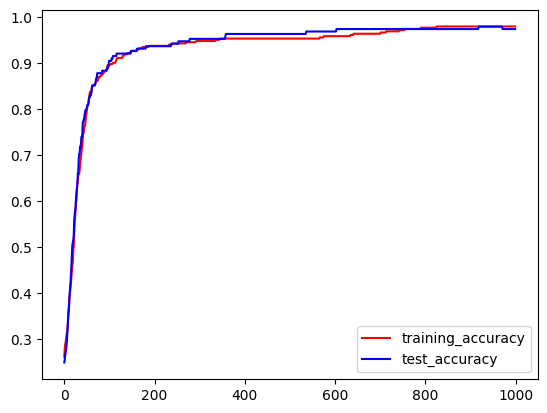

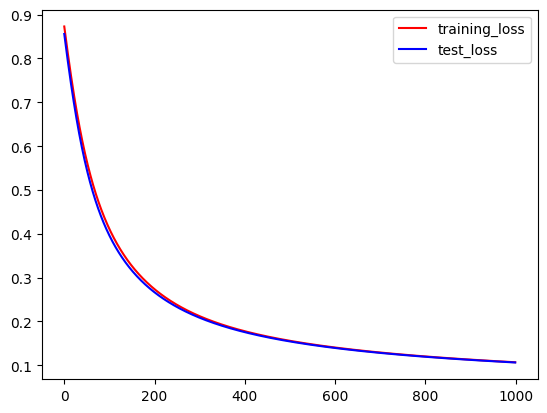

In [19]:
with torch.no_grad():
  plt.plot(Train_acc,c="red",label = "training_accuracy")
  plt.plot(Test_acc,c = "b",label = "test_accuracy")
  plt.legend()
  plt.show()
with torch.no_grad():
  plt.plot(losses_train,c="red",label = "training_loss")
  plt.plot(losses_test,c = "b",label = "test_loss")
  plt.legend()
  plt.show()

In [20]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3150, -0.2569, -0.3013, -0.2551, -0.2098, -0.0496, -0.1518, -0.4824,
                       -0.1765,  0.5291, -0.4851, -0.2013, -0.4596, -0.2179, -0.1017,  0.2616,
                        0.0170, -0.3388,  0.3479,  0.3787, -0.3088, -0.2751, -0.2297, -0.5250,
                       -0.3322, -0.3967, -0.3470, -0.2216, -0.3458, -0.2921]])),
             ('0.bias', tensor([0.3820]))])

In [22]:
torch.save(model.state_dict(),"model_classification")

In [23]:
model_2 = nn.Sequential(nn.Linear(D,1),nn.Sigmoid())

In [24]:
!ls

model_classification  sample_data


In [25]:
model_2.load_state_dict(torch.load("model_classification"))

<All keys matched successfully>

In [26]:
outputs  = model_2(X_train_norm_mod)
test_outputs = model_2(X_test_norm_mod)

train_acc = (outputs.detach().numpy().round()==Y_train_mod.detach().numpy()).mean()


test_acc = (test_outputs.detach().numpy().round()==Y_test_mod.detach().numpy()).mean()


print(train_acc,test_acc)

0.979002624671916 0.973404255319149


In [27]:
from google.colab import files
files.download("model_classification")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
model_2.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3150, -0.2569, -0.3013, -0.2551, -0.2098, -0.0496, -0.1518, -0.4824,
                       -0.1765,  0.5291, -0.4851, -0.2013, -0.4596, -0.2179, -0.1017,  0.2616,
                        0.0170, -0.3388,  0.3479,  0.3787, -0.3088, -0.2751, -0.2297, -0.5250,
                       -0.3322, -0.3967, -0.3470, -0.2216, -0.3458, -0.2921]])),
             ('0.bias', tensor([0.3820]))])

In [30]:
torch.save(model_2.state_dict(),"test")

In [31]:
!ls

model_classification  sample_data  test
